### Investigate 14999 null dates in item attempt dates

In [5]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
filterDf  = load_df('filterDf')

###### Create Dataframe of null observations

In [3]:
nullDf = filterDf.filter(F.col('item_attempt_start_datetime_utc').isNull())

nullDf.count()

14999

14,999 null observations

###### Display distinct values

In [4]:
distinct_val(nullDf)

,0
assessment_item_response_id (ia),NaN
assignment_attempt_number (aa),1
assignment_max_attempts (a),1
is_manual_scoring_required (aa),False
item_attempt_end_datetime_utc (ia),NaT
item_attempt_start_datetime_utc (ia),NaT


- assessment_item_response_id is null
  - learner did not attempt
- row_score not listed
  - It was scored
  - Could be unanswered questions

###### Compare dates with full sample

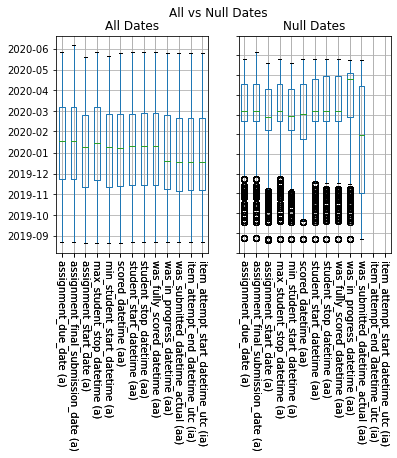

In [6]:
dual_date_boxplot(
    get_random_sample(filterDf),
    nullDf,
    title1="All Dates",
    title2='Null Dates',
    main='All vs Null Dates'
)

- Median shifted from 1/15 to 3/1
  - All assessment (a)
  - All assessment attempt (aa)
    - except was_submitted_datetime_actual
- Null
  - All item attempt (a)

###### Display counts of dates

In [5]:
date_min_max_null_unique(filterDf, types['intervalVars'])

assignment_due_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|190   |1566|2019-08-23 04:59:00|2020-05-26 04:59:00|
+------+----+-------------------+-------------------+

assignment_final_submission_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|199   |1566|2019-08-23 04:59:00|2020-06-05 04:59:00|
+------+----+-------------------+-------------------+

assignment_start_date
+------+----+-------------------+-------------------+
|unique|null|min                |max                |
+------+----+-------------------+-------------------+
|206   |1566|2019-08-21 05:00:00|2020-05-19 05:00:00|
+------+----+-------------------+-------------------+

item_attempt_end_datetime_utc
+------+-----+-----------------------+-----------------------+
|unique|null |min  

###### Common observations with null was_submitted_datetime_actual

In [6]:
nullDf.filter(F.col('was_submitted_datetime_actual').isNull()).count()

13994

- 13994 in common

###### Common observations with 0 raw_score

In [7]:
nullDf.filter(F.col('raw_score') == 0).count()

11701

- 11701 in common

#### Conclusion
- address with the 15710 null assessment_item_response_id solution

In [8]:
finish_todo('Investigate 14999 null dates in item attempt dates')